In [3]:
import pandas as pd 
data=['李光地','张红云','王鹏']
s=pd.Series(data=data,index=[1,2,3])
print(s)
print(type(s))

1    李光地
2    张红云
3     王鹏
dtype: object
<class 'pandas.core.series.Series'>


In [4]:
import pandas as pd 
data=[90,98,87]
index=['张三','李四','王五']
s=pd.Series(data=data,index=index)
print(s)

张三    90
李四    98
王五    87
dtype: int64


In [5]:
import pandas as pd 
data=['李光地','张红云','王鹏']
s=pd.Series(data=data)
print(s)


0    李光地
1    张红云
2     王鹏
dtype: object


In [6]:
print(s[0])

李光地


In [7]:
import pandas as pd 
data=[90,98,87]
index=['张三','李四','王五']
s=pd.Series(data=data,index=index)
print(s)

张三    90
李四    98
王五    87
dtype: int64


In [8]:
print(s['张三'])

90


In [9]:
print(s[['张三','王五']])

张三    90
王五    87
dtype: int64


In [10]:
import pandas as pd 
data=['李光地','张红云','王鹏']
s=pd.Series(data=data)
print(s)


0    李光地
1    张红云
2     王鹏
dtype: object


In [11]:
print(s[0:2:1])  #位置索引切片 含头不含尾

0    李光地
1    张红云
dtype: object


In [12]:
import pandas as pd 
data=[90,98,87]
index=['张三','李四','王五']
s=pd.Series(data=data,index=index)
print(s)

张三    90
李四    98
王五    87
dtype: int64


In [13]:
print(s['张三':'王五']) # 含头含尾

张三    90
李四    98
王五    87
dtype: int64


In [ ]:
import pandas as pd 
data=[90,98,87]
index=['张三','李四','王五']
s=pd.Series(data=data,index=index)
print(s)
print(s.index)
print(list(s.index))
print(s.values)
print(type(s.values))

                 主订单编号                子订单编号  \
0  6934177302770423185  6934177302770423185   
1  6934190430602007885  6934190430602007885   
2  6934168409959437494  6934168409959437494   
3  6934159686885840590  6934159686885840590   
4  6934179445937476928  6934179445937476928   

                                  选购商品         商品规格  商品数量  \
0  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
1  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
2  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
3  \t【抢！9.9包邮七层】眼影收纳盒桌面彩妆粉饼气垫多层口红化妆置物架    \t七层眼影架       1   
4     \t亚克力收纳盒学生桌面笔筒高颜值办公室摆件创意置物架透明书桌盒  \t透明色大五格收纳盒     1   

                  商品ID  商品单价  订单应付金额   运费  优惠总金额  ... 达人昵称 售后状态  取消原因  流量类型  \
0  3687499901589127386   9.9    9.90  0.0   0.00  ...  NaN    -   NaN    其他   
1  3687499901589127386   9.9    9.90  0.0   0.00  ...  NaN    -   NaN    其他   
2  3687499901589127386   9.9    9.90  0.0   0.00  ...  NaN    -   NaN    其他   
3  3687499901589127386   9.9    9.

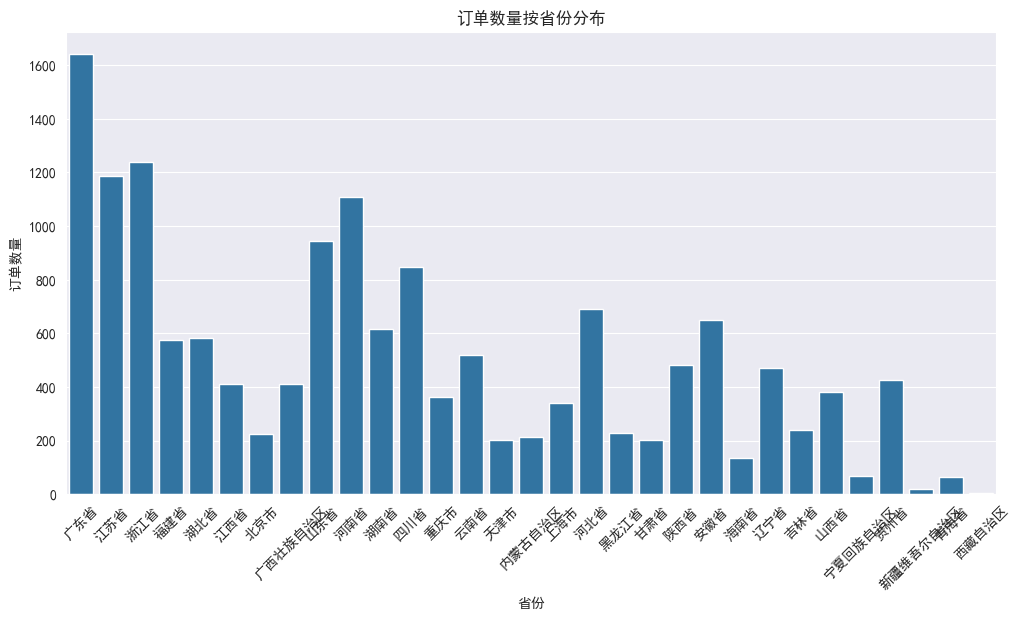

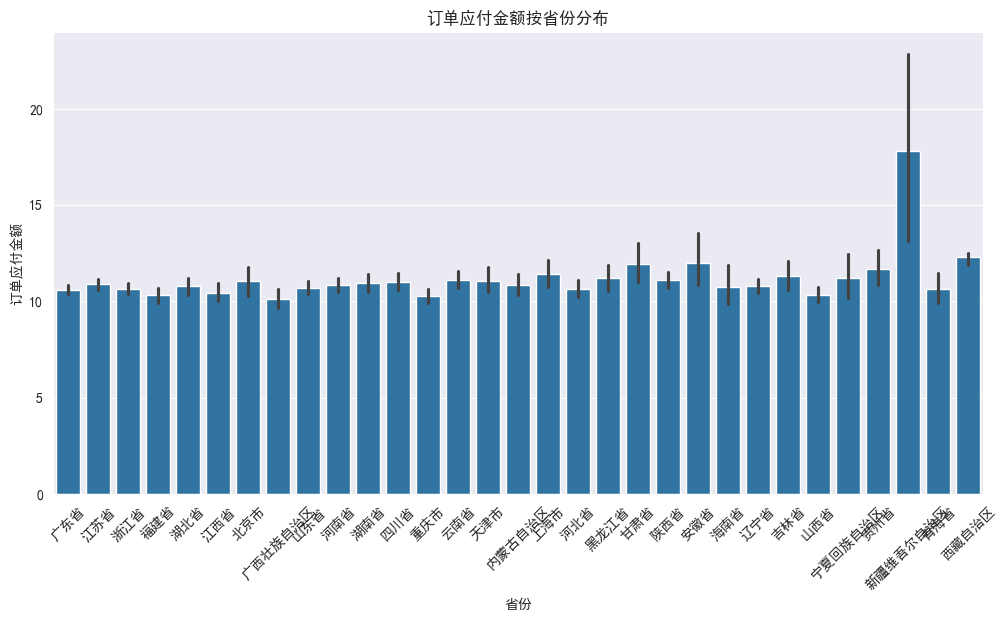

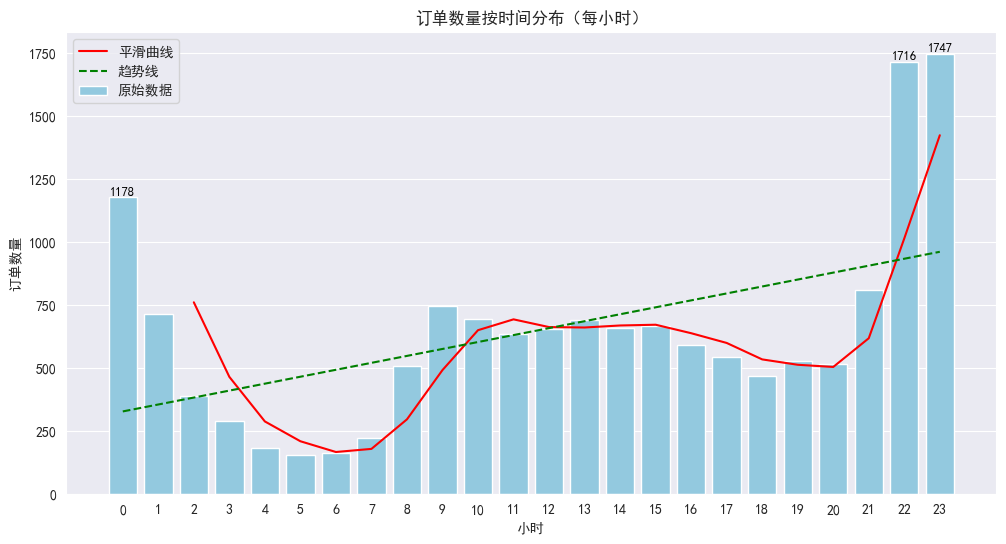

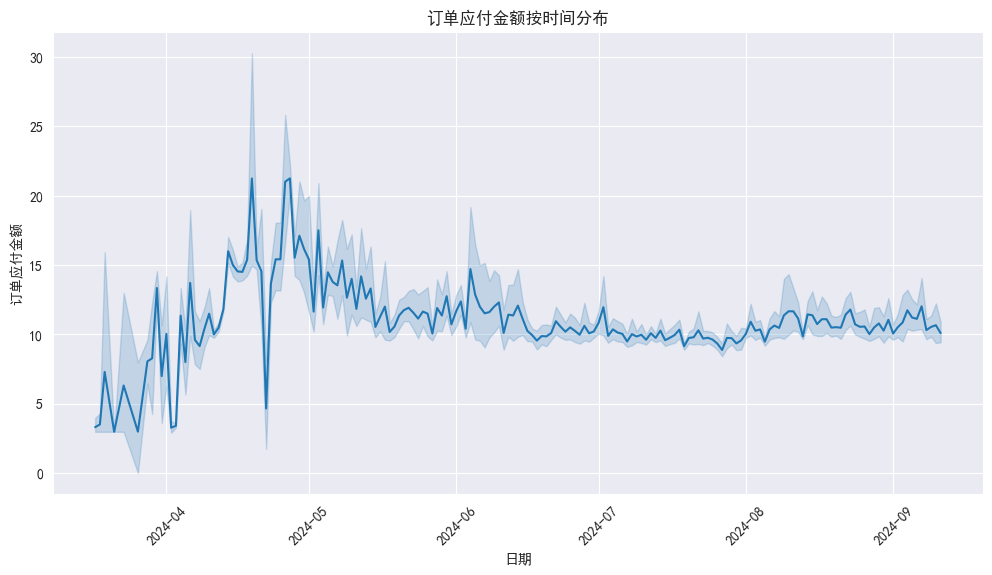

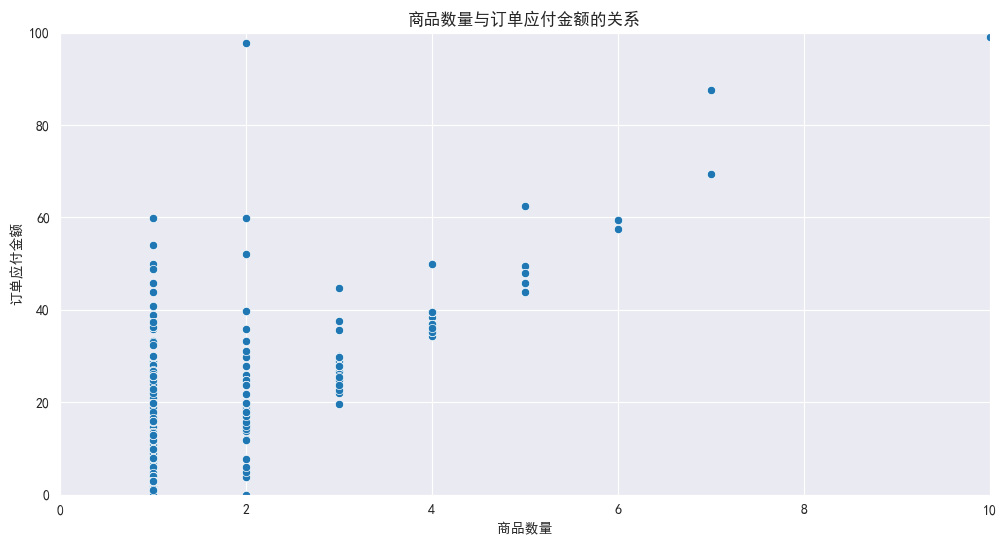

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 读取 CSV 文件
dy_sales = pd.read_csv(r'C:\Users\厉佳星\PycharmProjects\pythonProject2\pandas源码\douyinwangdian-select9.23.csv', encoding='utf_8')

# 显示前几行数据
print(dy_sales.head())

# 检查缺失值
print(dy_sales.isnull().sum())

# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 数据预处理
# 将时间列转换为 datetime 类型
dy_sales['订单提交时间'] = pd.to_datetime(dy_sales['订单提交时间'], errors='coerce')
dy_sales['订单完成时间'] = pd.to_datetime(dy_sales['订单完成时间'], errors='coerce')
dy_sales['支付完成时间'] = pd.to_datetime(dy_sales['支付完成时间'], errors='coerce')

# 提取日期部分
dy_sales['提交日期'] = dy_sales['订单提交时间'].dt.date
dy_sales['完成日期'] = dy_sales['订单完成时间'].dt.date
dy_sales['支付日期'] = dy_sales['支付完成时间'].dt.date

# 填充缺失值
dy_sales.fillna(0, inplace=True)

# 订单数量按省份分布
plt.figure(figsize=(12, 6))
sns.countplot(data=dy_sales, x='省')
plt.title('订单数量按省份分布')
plt.xlabel('省份')
plt.ylabel('订单数量')
plt.xticks(rotation=45)
plt.show()

# 订单应付金额按省份分布
plt.figure(figsize=(12, 6))
sns.barplot(data=dy_sales, x='省', y='订单应付金额')
plt.title('订单应付金额按省份分布')
plt.xlabel('省份')
plt.ylabel('订单应付金额')
plt.xticks(rotation=45)
plt.show()

# 订单数量按时间分布（每小时）
plt.figure(figsize=(12, 6))
# 提取小时信息
dy_sales['提交时间小时'] = dy_sales['订单提交时间'].dt.hour
# 计算每小时的订单数量
hourly_orders = dy_sales.groupby('提交时间小时').size().reset_index(name='订单数量')

# 平滑曲线
rolling_avg = hourly_orders['订单数量'].rolling(window=3).mean()

# 绘制原始数据
sns.barplot(data=hourly_orders, x='提交时间小时', y='订单数量', color='skyblue', label='原始数据')

# 绘制平滑曲线
plt.plot(hourly_orders['提交时间小时'], rolling_avg, color='red', label='平滑曲线')

# 添加趋势线
z = np.polyfit(hourly_orders['提交时间小时'], hourly_orders['订单数量'], 1)
p = np.poly1d(z)
plt.plot(hourly_orders['提交时间小时'], p(hourly_orders['提交时间小时']), color='green', linestyle='--', label='趋势线')

# 标注峰值
peaks = hourly_orders[hourly_orders['订单数量'] > hourly_orders['订单数量'].quantile(0.9)]
for index, row in peaks.iterrows():
    plt.text(row['提交时间小时'], row['订单数量'], f'{row["订单数量"]}', ha='center', va='bottom', fontsize=9, color='black')

# 设置 x 轴标签
plt.xticks(ticks=np.arange(24), labels=np.arange(24))

# 设置标题和标签
plt.title('订单数量按时间分布（每小时）')
plt.xlabel('小时')
plt.ylabel('订单数量')
plt.legend()

plt.show()

# 订单应付金额按时间分布
plt.figure(figsize=(12, 6))
sns.lineplot(data=dy_sales, x='提交日期', y='订单应付金额')
plt.title('订单应付金额按时间分布')
plt.xlabel('日期')
plt.ylabel('订单应付金额')
plt.xticks(rotation=45)
plt.show()

# 商品数量与订单应付金额的关系
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dy_sales, x='商品数量', y='订单应付金额')
plt.title('商品数量与订单应付金额的关系')
plt.xlabel('商品数量')
plt.ylabel('订单应付金额')
plt.xlim(0, 10)  # 设置 x 轴范围
plt.ylim(0, 100)  # 设置 y 轴范围
plt.show()


In [11]:
import chardet

# 检测文件编码
def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        result = chardet.detect(file.read())
    return result['encoding']

# 检测文件编码
# file_path = r'C:\Users\厉佳星\PycharmProjects\pythonProject2\pandas源码\select9.23.csv'
file_path = r'C:\Users\厉佳星\PycharmProjects\pythonProject2\pandas源码\douyinwangdian-select9.23.csv'
detected_encoding = detect_encoding(file_path)
print(f"Detected Encoding: {detected_encoding}")


Detected Encoding: utf-8


TypeError: read_csv() got an unexpected keyword argument 'errors'